In [2]:
 %matplotlib inline

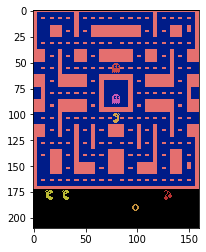

In [3]:
import gym

import matplotlib.pyplot as plt

env = gym.make('MsPacman-v0')
#env = gym.make('FrozenLake-v0')
env.reset()
bild = env.render(mode='rgb_array')
plt.imshow(bild)

In [4]:
import gym
import numpy as np
import random 

import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')
Q = np.zeros([env.observation_space.n,env.action_space.n])
EPISODES = 20000 
LEARNING_RATE = 0.3
DISCOUNT_FACTOR = 0.95 
EPSILON = 0.2 




def get_greedy(Q,s):
        if random.uniform(0,1)<EPSILON:
            return env.action_space.sample()
        else:
            return max(list(range(env.action_space.n)),key = lambda x: Q[s,x])
        
        
for i in range(EPISODES):
    s = env.reset()
    done = False
    while not done: 
            a = get_greedy(Q,s)
            s_next,r,done,_ = env.step(a)
            next_q = r + DISCOUNT_FACTOR *np.max(Q[s_next,:])
            Q[s,a] = (1-LEARNING_RATE)*Q[s,a] + LEARNING_RATE * next_q
            s = s_next
print(Q)

[[0.20201694 0.18743168 0.1875543  0.18737164]
 [0.05546597 0.13373163 0.12041653 0.17284794]
 [0.1531371  0.1579101  0.16166396 0.15862395]
 [0.07865653 0.07887143 0.04706744 0.14475755]
 [0.2456692  0.08937948 0.07966896 0.18766685]
 [0.         0.         0.         0.        ]
 [0.13817758 0.13472948 0.1153608  0.01663043]
 [0.         0.         0.         0.        ]
 [0.15958658 0.24558539 0.22755883 0.28699155]
 [0.16102806 0.34844722 0.41363039 0.3347045 ]
 [0.41902703 0.14794903 0.17083546 0.20515643]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.27011933 0.33566322 0.4796686  0.28819608]
 [0.52810383 0.70058434 0.51111727 0.55485979]
 [0.         0.         0.         0.        ]]


In [4]:
import tensorflow as tf
import numpy as np
import gym 

env = gym.make('FrozenLake-v0')
input_s = tf.placeholder(tf.float32,shape=(1,16))
w = tf.Variable(tf.random_uniform([16,4],0,0.01))
output_Q = tf.matmul(input_s,w)
predicted_action = tf.argmax(output_Q,1)
next_Q = tf.placeholder(tf.float32,shape=(1,4))
loss = tf.reduce_sum(tf.square(next_Q - output_Q))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
DISCOUNT_FACTOR = .99
EPSILON = 0.1
EPISODES = 200

with tf.Session() as session: 
    session.run(init)
    
    for i in range(EPISODES):
        s = env.reset()
        done = False
        while not done: 
            next_input = np.identity(16)[s:s+1]
            #prognose der besten action a und der q werte
            a, all_q = session.run([predicted_action, output_Q], feed_dict = {input_s:next_input})
            
            #zufällige action a mit gewisser wahrscheinlichkeit
            if np.random.rand(1) < EPSILON:
                a[0] = env.action_space.sample()
            
            #führe aktion aus (entweder die die das netzwerk sagt oder die die zufällig getroffen wurde)
            s_next,r,done,_ = env.step(a[0])
            next_input = np.identity(16)[s_next:s_next+1]
            q_next = session.run(output_Q, feed_dict = {input_s:next_input})
            
            
            max_q_next = np.max(q_next)  
            target_q = all_q
            target_q[0,a[0]] = r + DISCOUNT_FACTOR * max_q_next
            
            _,w1 = session.run([train,w],feed_dict ={input_s: np.identity(16)[s:s+1],next_Q:target_q})
            s = s_next  
    #Ergebnis
    for i in range(16):
        next_input = np.identity(16)[i:i + 1]
        all_q = session.run([output_Q], feed_dict = {input_s:next_input})
        print(i,all_q)

            

0 [array([[0.00793909, 0.00803159, 0.00793658, 0.00786711]], dtype=float32)]
1 [array([[0.00799664, 0.00687445, 0.0079689 , 0.00745642]], dtype=float32)]
2 [array([[0.00646788, 0.00769114, 0.00363641, 0.00590493]], dtype=float32)]
3 [array([[4.1092299e-03, 3.1560240e-03, 2.9468536e-06, 7.5178868e-03]],
      dtype=float32)]
4 [array([[0.00799213, 0.00651725, 0.00824136, 0.00764873]], dtype=float32)]
5 [array([[0.00859919, 0.00211352, 0.00738665, 0.00132546]], dtype=float32)]
6 [array([[0.00667146, 0.00690648, 0.00681102, 0.00494439]], dtype=float32)]
7 [array([[0.0064079 , 0.00338289, 0.00618664, 0.00500928]], dtype=float32)]
8 [array([[0.00856585, 0.0076665 , 0.00618916, 0.00660291]], dtype=float32)]
9 [array([[0.00837633, 0.00550205, 0.00727667, 0.00754536]], dtype=float32)]
10 [array([[0.00286961, 0.00238704, 0.00424644, 0.00514872]], dtype=float32)]
11 [array([[1.2779736e-03, 2.2446788e-03, 1.3066291e-04, 3.4908055e-05]],
      dtype=float32)]
12 [array([[0.00068798, 0.00780089, 0.

In [7]:
import numpy as np
print( np.identity(16)[2:3])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [1]:
# import gym
# env = gym.make('CartPole-v0')
# for i_episode in range(10):
#     observation = env.reset()
#     for t in range(100):
#         env.render()
#         print(observation)
#         action = env.action_space.sample()
#         observation, reward, done, info = env.step(action)
#         if done:
#             print("Episode finished after {} timesteps".format(t+1))
#             break
# env.close()

In [3]:
 %matplotlib inline

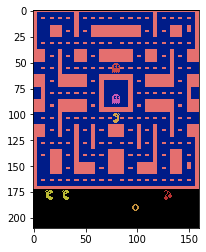

In [4]:
import gym
import matplotlib.pyplot as plt

env = gym.make('MsPacman-v0')
env.reset()

bild = env.render(mode='rgb_array')
plt.imshow(bild)

# done = False
# while not done:
#     env.render()
#     bild = env.render(mode='rgb_array')
#     s = env.action_space.sample()
#     s,r,done,info = env.step(a)